In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Coefficients (highest→constant): [ 1.79974081e-04 -1.58233130e-03 -5.52030305e-02  3.67440171e-01
  3.28939510e+00 -1.26002299e+01]


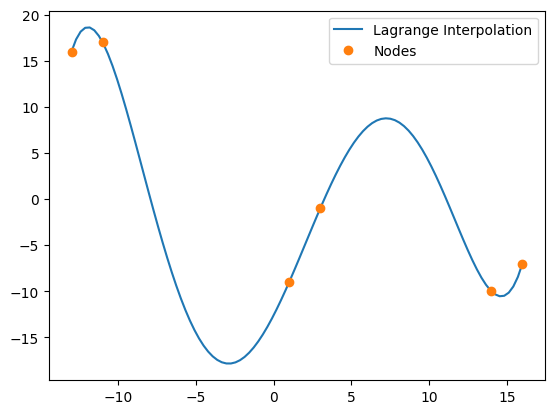

In [22]:
def lagrange_interpolator(x_points, y_points):
    """
    Build the Lagrange interpolating polynomial P(x) for given nodes.

    Args:
        x_points: array-like of shape (n+1,), distinct x-coordinates.
        y_points: array-like of shape (n+1,), corresponding y-values.

    Returns:
        P: function P(x) that evaluates the interpolant at scalar or array x.
        coeffs (optional): numpy array of polynomial coefficients [a_0, a_1, ..., a_n].
    """
    x = np.asarray(x_points, dtype=float)
    y = np.asarray(y_points, dtype=float)
    n = len(x)

    # Precompute denominators for each basis ℓ_i
    denom = np.array([np.prod(x[i] - x[np.arange(n) != i]) for i in range(n)])

    def P(eval_x):
        eval_x = np.asarray(eval_x, dtype=float)
        total = np.zeros_like(eval_x, dtype=float)
        # Sum over each basis polynomial
        for i in range(n):
            numer = np.prod(eval_x.reshape(-1,1) - x[np.arange(n) != i], axis=1)
            total += y[i] * numer / denom[i]
        return total

    # (Optional) Expand to get coefficients in the monomial basis
    # Start with zero polynomial
    coeffs = np.zeros(n, dtype=float)
    for i in range(n):
        # Build polynomial for ℓ_i: product over j≠i of (x - x_j)/(x_i - x_j)
        # In coefficient form:
        poly = np.poly(x[np.arange(n) != i])  
        poly = poly / denom[i]                
        coeffs = np.polyadd(coeffs, y[i] * poly)

    return P, coeffs

degree_of_poly_wanted = int(input("Enter the degree of the polynomial you want to interpolate: "))

data = np.random.randint(-15, 20, size=(degree_of_poly_wanted+1,2)).T
x_nodes = data[0]
y_nodes = data[1]

P, a = lagrange_interpolator(x_nodes, y_nodes)

# # Evaluate at some x
# xs = np.linspace(0, 2, 5)
# print("P(x):", P(xs))

# Polynomial coefficients a correspond to:
# a[0]*x^2 + a[1]*x + a[2]
print("Coefficients (highest→constant):", a)

# Plotting the polynomial and nodes

degree = len(a) - 1
x = np.linspace(min(x_nodes), max(x_nodes), 100)

plt.plot(x, P(x), label="Lagrange Interpolation")
plt.plot(x_nodes, y_nodes, 'o', label="Nodes")
plt.legend()
plt.show()


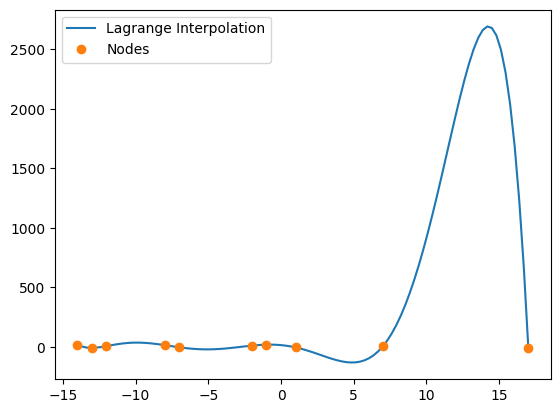